In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


((7043, 21), None)

In [6]:
df['Churn'].unique()


array(['No', 'Yes'], dtype=object)

In [7]:
df['Churn'] = (
    df['Churn']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'yes': 1, 'no': 0})
)


In [8]:
df['Churn'].isna().sum()
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df[df['tenure'] == 0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [11]:
df['TotalCharges'].dtype

dtype('O')

In [12]:
df[df['TotalCharges']==' '].shape

(11, 21)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

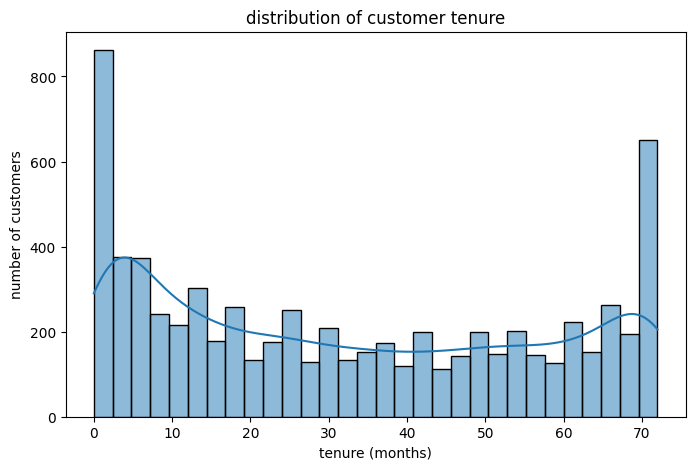

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'],bins=30,kde=True) #pdf
plt.title("distribution of customer tenure")
plt.xlabel("tenure (months)")
plt.ylabel("number of customers")
plt.show()

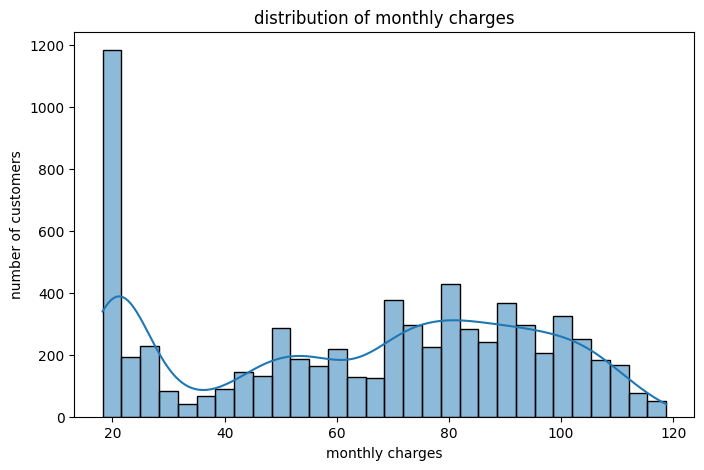

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyCharges'],bins=30,kde=True)
plt.title("distribution of monthly charges")
plt.xlabel("monthly charges")
plt.ylabel("number of customers")
plt.show()

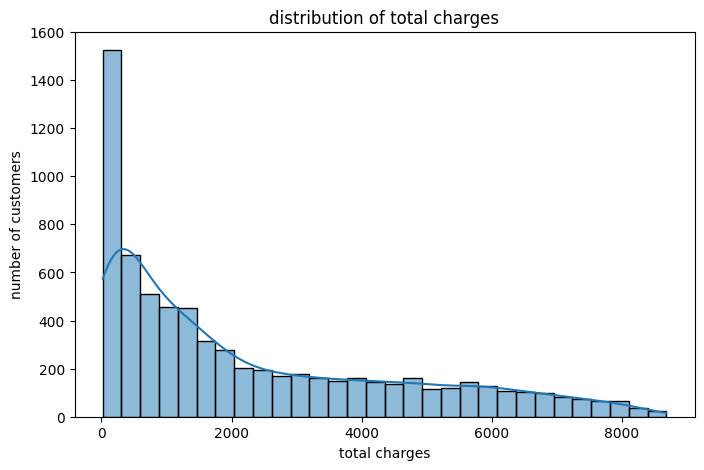

In [16]:
#convert TotalCharges from object to numeric for visualization
total_charges_numeric = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(8,5))
sns.histplot(total_charges_numeric,bins=30,kde=True)
plt.title("distribution of total charges")
plt.xlabel("total charges")
plt.ylabel("number of customers")
plt.show()

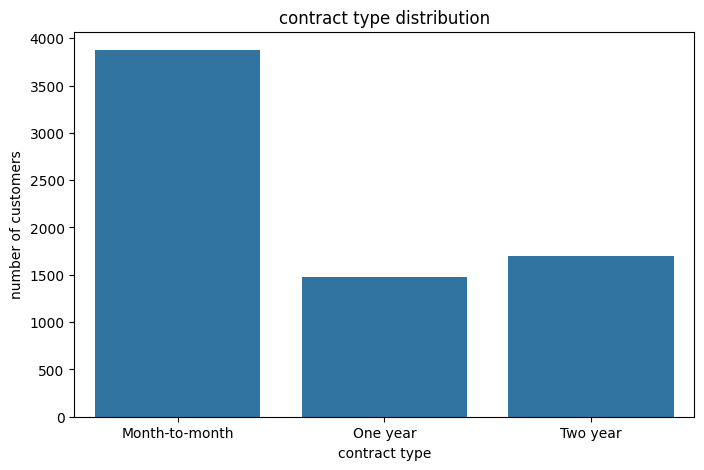

In [17]:
#contract measures commitment
plt.figure(figsize=(8,5))
sns.countplot(x='Contract',data=df)
plt.title("contract type distribution")
plt.xlabel("contract type")
plt.ylabel("number of customers")
plt.show()

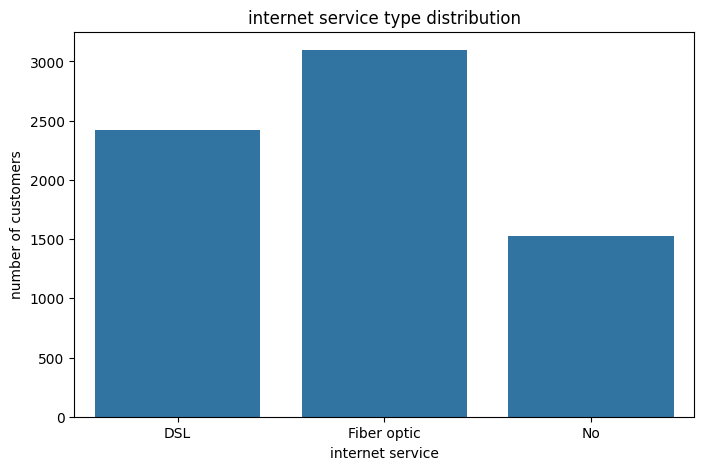

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x="InternetService",data=df)
plt.title("internet service type distribution")
plt.xlabel("internet service")
plt.ylabel("number of customers")
plt.show()

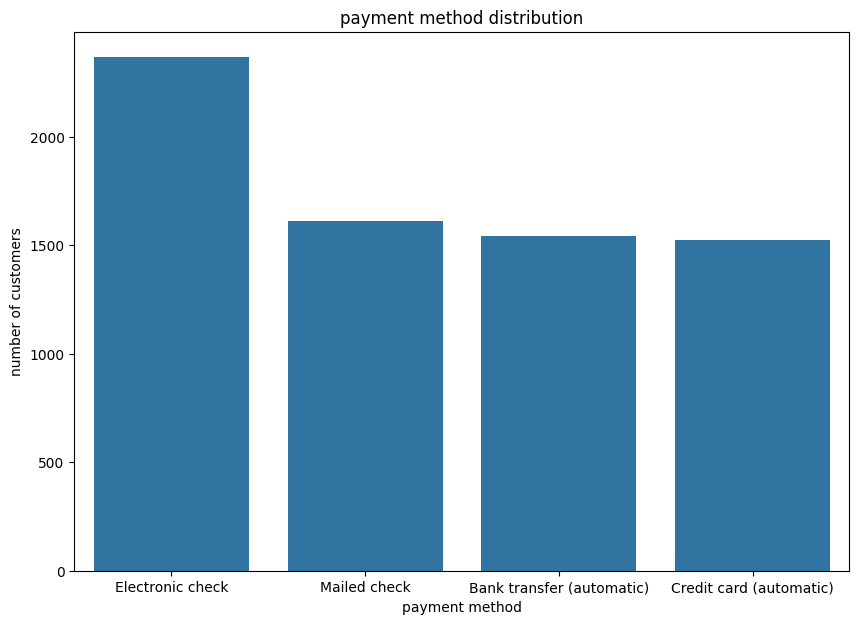

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x='PaymentMethod',data=df)
plt.title("payment method distribution")
plt.xlabel("payment method")
plt.ylabel("number of customers")
plt.show()

In [20]:
#contract vs churn
contract_churn_rate = (
    df.groupby('Contract')['Churn']
    .mean()
    .reset_index()
)
contract_churn_rate


,Contract,Churn
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


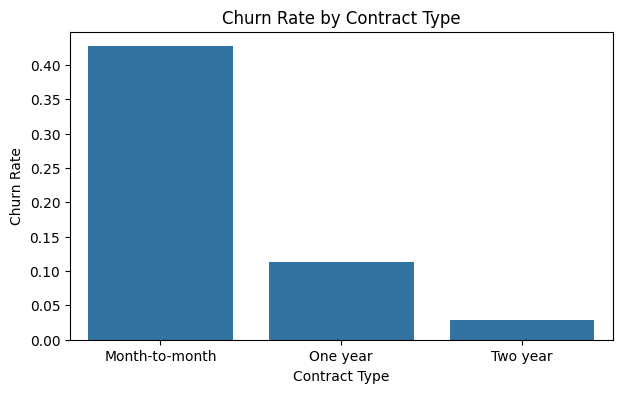

In [21]:
plt.figure(figsize=(7,4))
sns.barplot(x='Contract', y='Churn', data=contract_churn_rate)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.show()


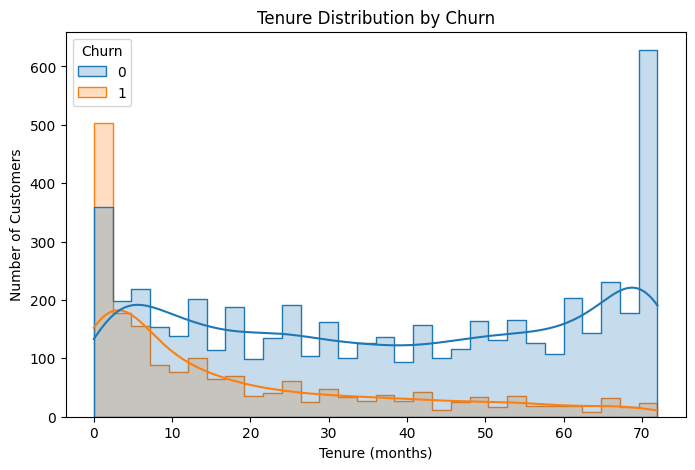

In [22]:
#tenure vs churn
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='tenure',
    hue='Churn',
    bins=30,
    kde=True,
    element='step'
)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


In [23]:
#internet service vs churn
internet_churn_rate = (
    df.groupby('InternetService')['Churn'].mean().reset_index()
)
internet_churn_rate

,InternetService,Churn
0,DSL,0.189591
1,Fiber optic,0.418928
2,No,0.074050


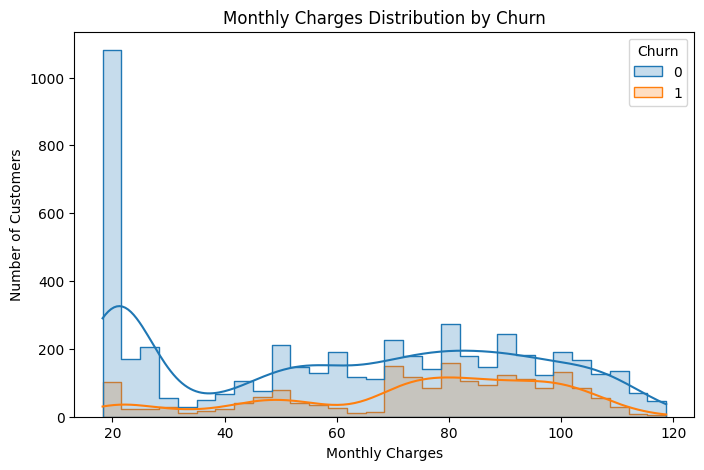

In [24]:
#monthly charges vs churn
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    bins=30,
    kde=True,
    element='step'
)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()


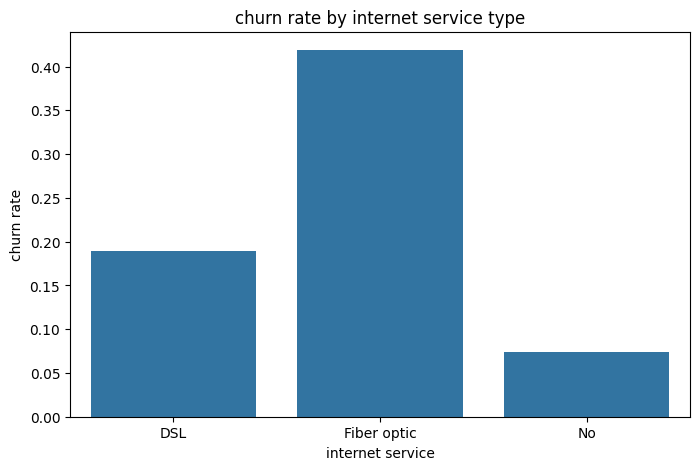

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='InternetService',y='Churn',data=internet_churn_rate)
plt.title("churn rate by internet service type")
plt.xlabel("internet service")
plt.ylabel("churn rate")
plt.show()

In [26]:
#payment method vs churn
payment_churn_rate = (
    df.groupby('PaymentMethod')['Churn'].mean().reset_index()
)
payment_churn_rate

,PaymentMethod,Churn
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431
2,Electronic check,0.452854
3,Mailed check,0.191067


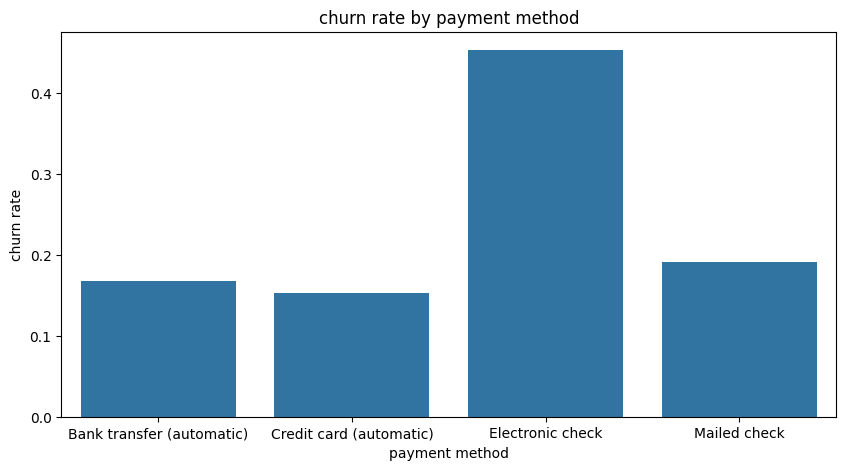

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='PaymentMethod',y='Churn',data=payment_churn_rate)
plt.title("churn rate by payment method")
plt.xlabel("payment method")
plt.ylabel("churn rate")
plt.show()

In [28]:
#correlation analysis
num_cols=['tenure','MonthlyCharges','TotalCharges']
df['TotalCharges_numeric'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
num_df = df[['tenure','MonthlyCharges','TotalCharges_numeric']]

In [29]:
corr_matrix = num_df.corr()
corr_matrix

,tenure,MonthlyCharges,TotalCharges_numeric
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges_numeric,0.82588,0.651065,1.000000


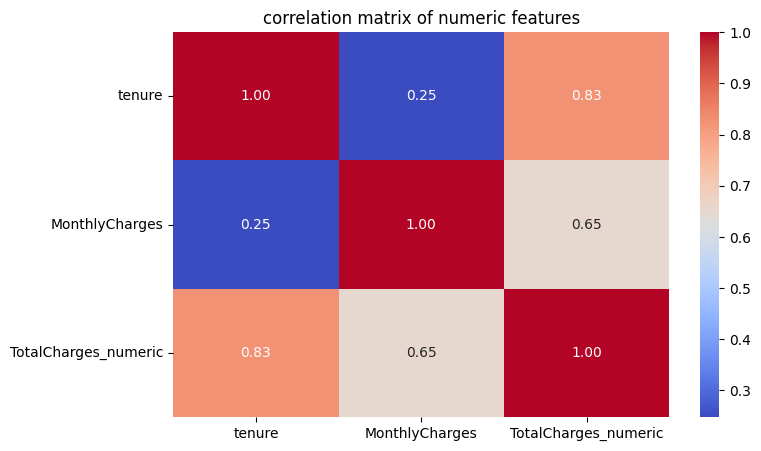

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("correlation matrix of numeric features")
plt.show()

In [31]:
X = df.drop(columns=['Churn','customerID','TotalCharges'])
y = df['Churn']

In [32]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges_numeric
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [33]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()
categorical_features, numerical_features

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges_numeric'])

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [36]:
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler())
])

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numerical_features),
        ('cat',OneHotEncoder(drop='first', handle_unknown='ignore'),categorical_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges_numeric']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_reg = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(max_iter=1000))
])
log_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges_numeric']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [40]:
log_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges_numeric']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [41]:
#predictions
y_test_proba = log_reg.predict_proba(X_test)[:,1]
y_test_proba

array([0.0458386 , 0.68375823, 0.06007238, ..., 0.15420197, 0.00444228,
       0.00642594])

In [42]:
y_test_pred = log_reg.predict(X_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [43]:
from sklearn.metrics import (
    accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
)

In [44]:
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
roc_auc = roc_auc_score(y_test,y_test_pred)

accuracy,precision,recall,roc_auc

(0.8069552874378992,
 0.660377358490566,
 0.5614973262032086,
 np.float64(0.7285747500581261))

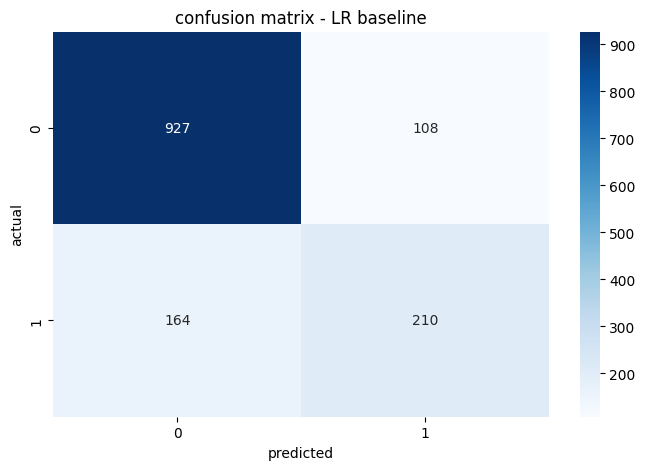

In [45]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix - LR baseline")
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])
rf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges_numeric']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [48]:
rf_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges_numeric']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [49]:
rf_proba = rf_model.predict_proba(X_test)[:,1]
rf_pred = rf_model.predict(X_test)
rf_proba,rf_pred

(array([0.   , 0.795, 0.09 , ..., 0.07 , 0.12 , 0.015]),
 array([0, 1, 0, ..., 0, 0, 0]))

In [50]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba)

rf_accuracy, rf_precision, rf_recall, rf_roc_auc


(0.7899219304471257,
 0.6291390728476821,
 0.5080213903743316,
 np.float64(0.8259074117130384))

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

In [53]:
xgb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges_numeric']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [54]:
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_proba,xgb_pred

(array([0.00793893, 0.9084227 , 0.10394634, ..., 0.09248325, 0.05059673,
        0.00538309], dtype=float32),
 array([0, 1, 0, ..., 0, 0, 0]))

In [55]:
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_proba)

xgb_accuracy, xgb_precision, xgb_recall, xgb_roc_auc


(0.8041163946061036,
 0.6611842105263158,
 0.5374331550802139,
 np.float64(0.8407812136712393))

In [56]:
results = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest','XGBoost'],
    'Accuracy': [accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [precision, rf_precision, xgb_precision],
    'Recall': [recall, rf_recall, xgb_recall],
    'ROC-AUC': [roc_auc, rf_roc_auc, xgb_roc_auc]
})
results

,Model,Accuracy,Precision,Recall,ROC-AUC
0,Logistic Regression,0.806955,0.660377,0.561497,0.728575
1,Random Forest,0.789922,0.629139,0.508021,0.825907
2,XGBoost,0.804116,0.661184,0.537433,0.840781


In [57]:
#tuning threshold
thresholds = np.arange(0.2,0.81,0.05)
threshold_results=[]

for t in thresholds:
    y_pred_t = (y_test_proba >= t).astype(int)

    precision_opt =  precision_score(y_test,y_pred_t)
    recall_opt = recall_score(y_test,y_pred_t)

    threshold_results.append({
      'threshold':t,
      'precision':precision_opt,
      'recall':recall_opt
})
    

In [58]:
threshold_df = pd.DataFrame(threshold_results)
threshold_df

,threshold,precision,recall
0,0.20,0.467153,0.855615
1,0.25,0.498355,0.810160
2,0.30,0.519337,0.754011
3,0.35,0.544148,0.708556
4,0.40,0.570776,0.668449
5,0.45,0.600522,0.614973
6,0.50,0.660377,0.561497
7,0.55,0.677165,0.459893
8,0.60,0.717703,0.401070
9,0.65,0.753247,0.310160


In [59]:
FINAL_THRESHOLD = 0.40

In [60]:
y_pred_final = (y_test_proba >= FINAL_THRESHOLD).astype(int)
y_pred_final

array([0, 1, 0, ..., 0, 0, 0])

In [61]:
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_conf_matrix = confusion_matrix(y_test, y_pred_final)

final_precision, final_recall, final_conf_matrix


(0.5707762557077626,
 0.6684491978609626,
 array([[847, 188],
        [124, 250]]))

In [62]:
xgb_clf = xgb_model.named_steps['model']

In [68]:
X_test_transformed = xgb_model.named_steps['preprocessor'].transform(X_test)
X_test_transformed.dtype

dtype('float64')

In [64]:
feature_names = xgb_model.named_steps['preprocessor'].get_feature_names_out()

In [88]:
X_test_shap = np.array(X_test_transformed)

In [89]:
import shap

def predict_fn(X):
    return xgb_clf.predict_proba(X)[:,1]

explainer = shap.Explainer(
    predict_fn,
    X_test_shap
)

shap_values = explainer(X_test_shap)

PermutationExplainer explainer: 1410it [01:58, 10.86it/s]                          


/tmp/ipykernel_55/654530092.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


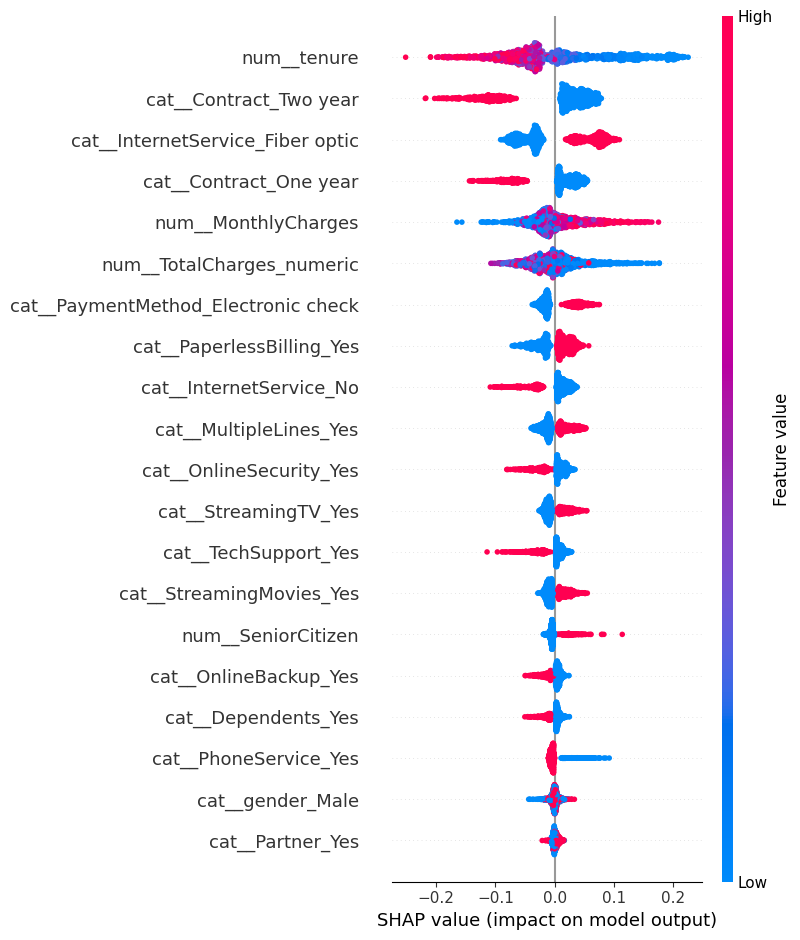

In [78]:
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=feature_names
)

In [79]:
#top 10 most important churn drivers
shap_importance = np.abs(shap_values.values).mean(axis=0)

In [80]:
shap_df = pd.DataFrame({
    'feature':feature_names,
    'importance':shap_importance
}).sort_values(by='importance',ascending=False)

shap_df.head(10)

,feature,importance
1,num__tenure,0.071738
25,cat__Contract_Two year,0.056045
10,cat__InternetService_Fiber optic,0.054136
24,cat__Contract_One year,0.036257
2,num__MonthlyCharges,0.032182
3,num__TotalCharges_numeric,0.031078
28,cat__PaymentMethod_Electronic check,0.024480
26,cat__PaperlessBilling_Yes,0.022485
11,cat__InternetService_No,0.020967
9,cat__MultipleLines_Yes,0.018558


In [87]:
high_risk_index = np.argmax(y_test_proba) #riskiest customer
X_high_risk = X_test_shap[high_risk_index] #customer's data
shap_values_high_risk = shap_values[high_risk_index] #shap explanation

local_explanation = pd.DataFrame({
    'feature':feature_names,
    'shap_value':shap_values_high_risk.values
}).sort_values(by='shap_value',ascending=False)

local_explanation.head(10)


,feature,shap_value
1,num__tenure,0.188982
10,cat__InternetService_Fiber optic,0.078136
25,cat__Contract_Two year,0.071990
3,num__TotalCharges_numeric,0.043226
0,num__SeniorCitizen,0.037445
24,cat__Contract_One year,0.034687
9,cat__MultipleLines_Yes,0.030708
28,cat__PaymentMethod_Electronic check,0.029006
11,cat__InternetService_No,0.028558
19,cat__TechSupport_Yes,0.025065
